## Processamento de imagem

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import cv2
frame = cv2.imread('trash_on_water.jpg')

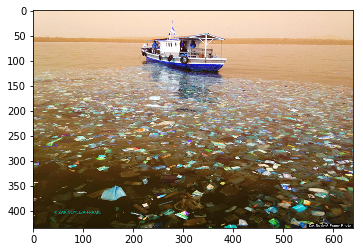

In [3]:
plt.imshow(frame)

In [25]:
gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [11]:
gray_frame

array([[217, 218, 218, ..., 209, 207, 206],
       [217, 217, 218, ..., 208, 207, 206],
       [216, 217, 217, ..., 207, 207, 207],
       ...,
       [ 23,  22,  21, ...,   0,   2,   0],
       [ 24,  23,  23, ...,   1,   0,   3],
       [ 21,  20,  20, ...,   1,   0,   3]], dtype=uint8)

In [12]:
gray_frame = cv2.GaussianBlur(gray_frame, (5, 5), 0)

array([[217, 217, 217, ..., 208, 207, 207],
       [217, 217, 217, ..., 207, 207, 207],
       [217, 217, 217, ..., 207, 207, 207],
       ...,
       [ 22,  22,  23, ...,   5,   1,   1],
       [ 22,  22,  22, ...,   2,   1,   1],
       [ 22,  22,  22, ...,   1,   1,   1]], dtype=uint8)

In [21]:
cv2.imshow("bla", gray_frame)

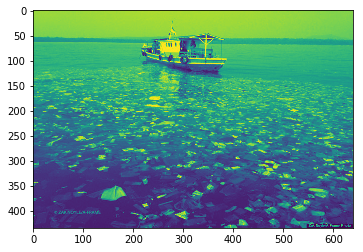

In [26]:
plt.imshow(gray_frame)

In [27]:
subtractor = cv2.createBackgroundSubtractorMOG2(history=20, varThreshold=25, detectShadows=True)

In [28]:
mask = subtractor.apply(frame)

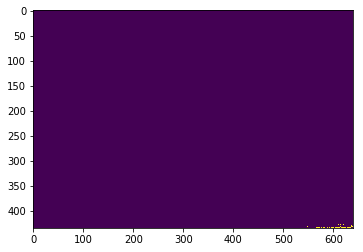

In [29]:
plt.imshow(mask)

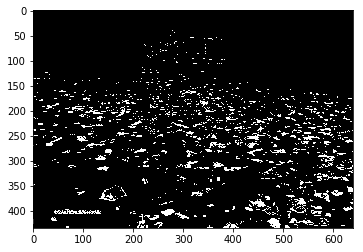

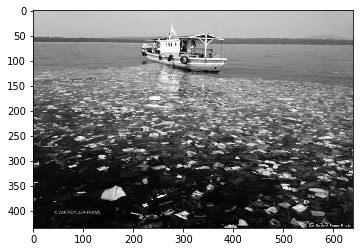

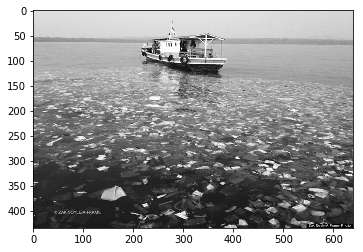

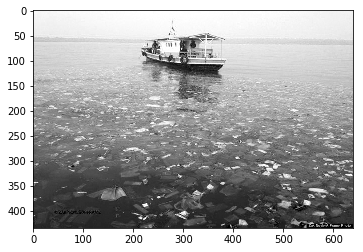

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('trash_on_water.jpg')

qtdeLinhas, qtdeColunas, c = img.shape

B = img[:,:,0]
G = img[:,:,1]
R = img[:,:,2]

W = np.zeros((qtdeLinhas, qtdeColunas), dtype=int) #criando uma imagem toda preta (todos os pixels com valores = 0)


for i in range(qtdeLinhas):
    for j in range(qtdeColunas):
        if(G[i,j] > R[i,j] and G[i,j] > B[i,j]):
            W[i,j] = 255
        

plt.gray()
plt.imshow(W)
plt.show()
plt.imshow(R)
plt.show()
plt.imshow(G)
plt.show()
plt.imshow(B)

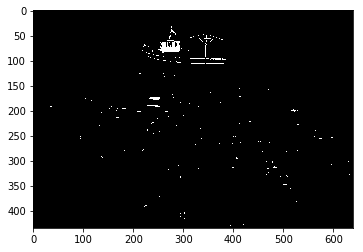

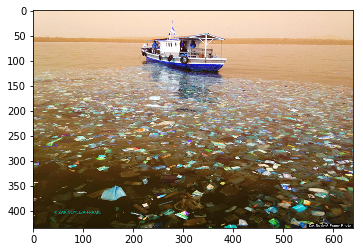

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('trash_on_water.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #transformando a imagem em nível de cinza
_, imgBinaria = cv2.threshold(gray, 235, 255, cv2.THRESH_BINARY) #seleciona apenas os pixels dentro do intervalo [250,255]



plt.gray()
plt.imshow(imgBinaria)
plt.show()
plt.imshow(img)

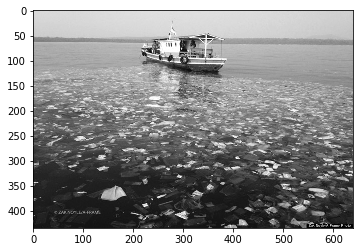

In [33]:
plt.imshow(gray)

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('trash_on_water.jpg')
r = 150.0 / image.shape[1]
dim = (150, int(image.shape[0] * r))
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
lower_white = np.array([220, 220, 220], dtype=np.uint8)
upper_white = np.array([255, 255, 255], dtype=np.uint8)
mask = cv2.inRange(resized, lower_white, upper_white) # could also use threshold
res = cv2.bitwise_not(resized, resized, mask)
plt.imshow(res) # gives black background

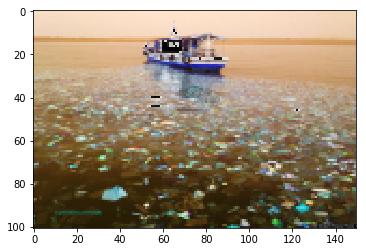

In [3]:
plt.imshow(res)

In [35]:
import cv2
import numpy as np

img = cv2.imread("trash_on_water.jpg", cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)[...,0]
# edges = cv2.Canny(gray, 10,30)    
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(32,32))
contrast = clahe.apply(blurred)
ret, thresh = cv2.threshold(contrast, 20, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)

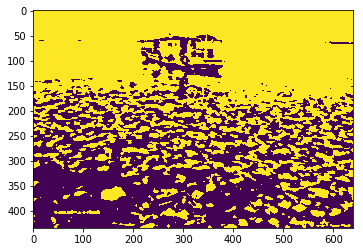

In [47]:
plt.imshow(thresh)
plt.savefig('./threshold.png')

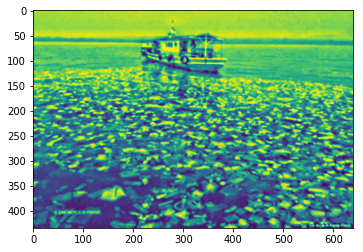

In [6]:
plt.imshow(contrast)

In [43]:
frame = cv2.imread('trash_on_water.jpg')
backsub = cv2.createBackgroundSubtractorKNN()
fgMask = backsub.apply(frame)

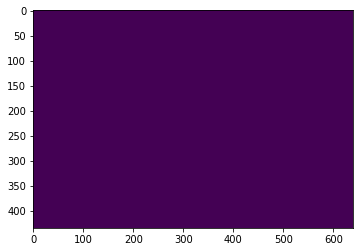

In [44]:
plt.imshow(fgMask)